In [2]:
# Load libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [4]:
train = pd.read_csv(r"C:\Siddhesh Data\Study\My Interest\Kaggle\Propensity to Purchase\Dataset\training_sample.csv")
train.dtypes

UserID                     object
basket_icon_click           int64
basket_add_list             int64
basket_add_detail           int64
sort_by                     int64
image_picker                int64
account_page_click          int64
promo_banner_click          int64
detail_wishlist_add         int64
list_size_dropdown          int64
closed_minibasket_click     int64
checked_delivery_detail     int64
checked_returns_detail      int64
sign_in                     int64
saw_checkout                int64
saw_sizecharts              int64
saw_delivery                int64
saw_account_upgrade         int64
saw_homepage                int64
device_mobile               int64
device_computer             int64
device_tablet               int64
returning_user              int64
loc_uk                      int64
ordered                     int64
dtype: object

In [7]:
# get additional infomration on the dataframe
train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Information about the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

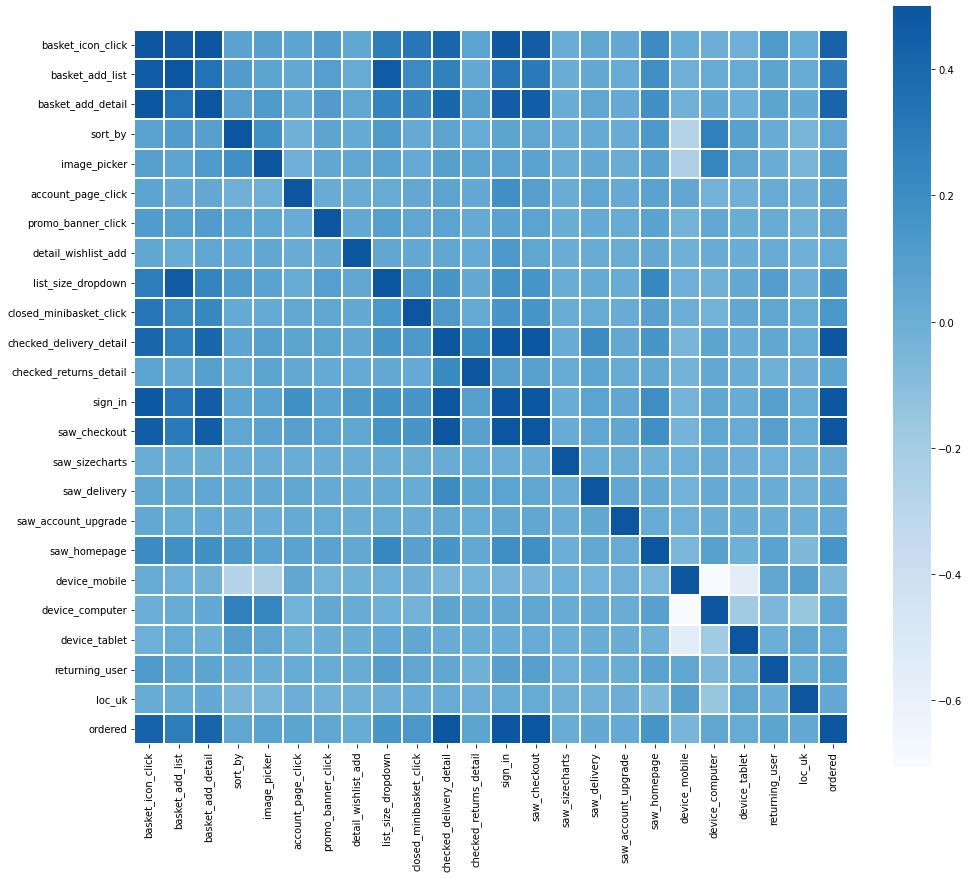

In [13]:
# Heatmap to see correlation between individual action on the website and if customer ordered or not
import seaborn as sns
corr = train.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr,vmax=0.5,center=0,square=True,linewidths=2,cmap='Blues')
plt.show()

In [16]:
#Closer look of correlation for the order column
train.corr()['ordered']

basket_icon_click          0.428334
basket_add_list            0.287666
basket_add_detail          0.414420
sort_by                    0.054636
image_picker               0.071492
account_page_click         0.057279
promo_banner_click         0.056533
detail_wishlist_add        0.023516
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
checked_delivery_detail    0.798720
checked_returns_detail     0.059484
sign_in                    0.665556
saw_checkout               0.708986
saw_sizecharts             0.007548
saw_delivery               0.031461
saw_account_upgrade        0.025857
saw_homepage               0.157778
device_mobile             -0.042907
device_computer            0.049208
device_tablet              0.016939
returning_user             0.060295
loc_uk                     0.031643
ordered                    1.000000
Name: ordered, dtype: float64

In [18]:
# Drop predictors if they don't have stronger correlation to ordered (dependent variable)
predictors = train.drop(['ordered','UserID','device_mobile'],axis=1)
predictors

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,1,0,1,0,0,0,0,1,0,...,1,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
455397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
455398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
455399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
# Choose target as ordered which is our dependent variable
targets = train['ordered']
targets

0         0
1         0
2         0
3         0
4         1
         ..
455396    0
455397    0
455398    0
455399    0
455400    0
Name: ordered, Length: 455401, dtype: int64

In [26]:
#Check if we have correct predictors
predictors.columns

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_computer', 'device_tablet', 'returning_user',
       'loc_uk'],
      dtype='object')

In [27]:
#Let's split data into train and test
X_train,X_test,y_train,y_test = train_test_split(predictors,targets,test_size=0.3)
print("Predictor Training :",X_train.shape, "Predictor-testing:",X_test.shape)

In [40]:
# Using machine learning model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier = classifier.fit(X_train,y_train)

predictions = classifier.predict(X_test)


#Accuracy checking of the model. Compare predicted result with actual y_test which we had kept aside earlier
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[129331,   1509],
       [    72,   5709]], dtype=int64)

In [41]:
#Accuracy score - Check in details for recall, precision as well. What they shows
sklearn.metrics.accuracy_score(y_test,predictions)

0.9884278405223209

In [43]:
# Let's see test this on another sample data of customers who visited website yesterday but didn't purchase
yesterdays_prospects = pd.read_csv(r"C:\Siddhesh Data\Study\My Interest\Kaggle\Propensity to Purchase\Dataset\testing_sample.csv")
yesterdays_prospects.info()

In [53]:
#MAke this testing data identical to our training data 
userids = yesterdays_prospects.UserID # Storing userid in variable for later mapping purpose
yesterdays_prospects = yesterdays_prospects.drop(['ordered','UserID','device_mobile'],axis=1)
yesterdays_prospects.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
#LEt's check shape of testing data
yesterdays_prospects.shape

(151655, 22)

In [83]:
#Let's run predictions and enter the predictions into column called propensity
yesterdays_prospects['propensity'] = classifier.predict_proba(yesterdays_prospects)[:,1]

In [84]:
yesterdays_prospects.head(10)

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk,propensity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
5,1,0,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,1,0,1.0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0.0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
8,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,1,0.0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [90]:
# Let's finally bring userid column back
pd.DataFrame(userids)
results = pd.concat([userids,yesterdays_prospects],axis=1)

In [96]:
#View results
results[results['propensity'] == 1]

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk,propensity
5,7j3d-j382-47157j3d-j382-4d3b-955343,1,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,1,1,0,1.0
23,743b-08d2-4717743b-08d2-4634-230774,1,1,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1.0
58,b488-015d-472bb488-015d-4k88-211609,1,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,1.0
138,7d44-bbj7-47497d44-bbj7-4k72-636933,0,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,1,1,1.0
162,7281-j047-47557281-j047-4425-872188,1,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150597,b5bb-4j1j-0847b5bb-4j1j-4b53-208326,1,1,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,1,1.0
150845,9898-k956-08jk9898-k956-42b7-211517,1,1,1,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,1.0
150858,1460-d5b1-08b21460-d5b1-4517-620010,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1.0
150911,44b7-0k77-08k744b7-0k77-44b9-418990,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1.0
